# Supervised learning of an ANN

In [2]:
import pandas
import os
import sys
# Add the parent directory (two levels up) to sys.path
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import numpy as np
import matplotlib.pyplot as plt
from utils import *

In [3]:
import torch
STACK = True

log_file_path = "../environment/logs/random_example.log"

bx, by, px, py, mdx, mdy, score, time, dbx, dby = read_data(log_file_path)

# data organization
y = np.array(dbx)
mdx = np.array(mdx)
if STACK:
    Nstack = 10
    stacks = []
    for j in range(Nstack):
        stacks += [np.hstack( (mdx[:j],mdx[j:]) )]     

    # [t0 t-1 t-2 t-3]

    x = np.array(stacks)[:, 1:].T

else :
    x = mdx[1:]  # mdx[:] mdx[]

    # print(f"len stacks i  :  {i} :", len(stacks[i]))

# x = np.array(mdx[1:]) # mdx[:] mdx[]
# print(x)
y = torch.tensor([y]).to(torch.float32)
x = torch.tensor(x).to(torch.float32)

print("yshape : ", y.shape)
print("xshape : ", x.shape)

yshape :  torch.Size([1, 3749])
xshape :  torch.Size([3749, 10])


/tmp/ipykernel_7205/3973955626.py:28: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  y = torch.tensor([y]).to(torch.float32)


In [4]:
import torch.nn as nn

class ANN(nn.Module):

    def __init__(self, neurons = [4, 32, 32, 1]):
        super(ANN, self).__init__()

        self.layer = nn.ModuleList([nn.Linear(neurons[i-1], neurons[i]) for i in range(1, len(neurons))])

    def forward(self, x):

        for i in range(len(self.layer)):
            x = self.layer[i](x)
            if i != len(self.layer) - 1:
                x = nn.Tanh()(x)

        return x
    
if Nstack:
    ann_controller = ANN(neurons = [Nstack, 32, 32, 1])
    ann_controller(torch.tensor(torch.ones(Nstack)).to(torch.float32))
else:
    and_controller = ANN(neurons = [1, 16, 16, 1])
    ann_controller(torch.tensor(torch.ones(Nstack)).to(torch.float32))


/tmp/ipykernel_7205/2221176834.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ann_controller(torch.tensor(torch.ones(Nstack)).to(torch.float32))


In [5]:
# data loader

from torch.utils.data import Dataset, DataLoader
from torch.utils.data import random_split

class dataset1D(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    

dataset = dataset1D(x, y.T)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

train, val = random_split(dataset, [0.8, 0.2])

trainloader = DataLoader(train, batch_size=10, shuffle=True)
valloader = DataLoader(val, batch_size=10, shuffle=True)


In [6]:
# training
import torch


lr = 1e-3
epochs = 100
opt = torch.optim.Adam(ann_controller.parameters(), lr=lr)


loss_val = []


for epoch in range(epochs):

    running_loss = 0.
    last_loss = 0.

    # train one epochs
    for i, data in enumerate(trainloader):
        x, y = data
        vloss = 0
        # free gradient before each bacth
        # opt.zero_grad()

        y_pred = ann_controller(x)
        loss = nn.MSELoss()(y_pred, y)
        loss.backward()
        opt.step()
        opt.zero_grad()

                # Gather data and report
        running_loss += loss.item()
    
    print("epochs : {} loss : {}".format(epoch, running_loss/i))
    loss_val.append(running_loss/i)


epochs : 0 loss : 4.672788748773045
epochs : 1 loss : 4.553577684638492
epochs : 2 loss : 4.522359520595608
epochs : 3 loss : 4.556769983425587
epochs : 4 loss : 4.527245505498006
epochs : 5 loss : 4.525240849292398
epochs : 6 loss : 4.524563704545681
epochs : 7 loss : 4.543699150898783
epochs : 8 loss : 4.537510283415932
epochs : 9 loss : 4.520878190479948
epochs : 10 loss : 4.525466301269755
epochs : 11 loss : 4.519386911272604
epochs : 12 loss : 4.541196825811297
epochs : 13 loss : 4.520365834884021
epochs : 14 loss : 4.51798673058832
epochs : 15 loss : 4.5192346715658
epochs : 16 loss : 4.515649779584495
epochs : 17 loss : 4.501321327925526
epochs : 18 loss : 4.53070108148964
epochs : 19 loss : 4.525901013094446
epochs : 20 loss : 4.518841354543947
epochs : 21 loss : 4.520022165017782
epochs : 22 loss : 4.522976189752088
epochs : 23 loss : 4.523984983114893
epochs : 24 loss : 4.514060759026071
epochs : 25 loss : 4.516125177160952
epochs : 26 loss : 4.527098491837747
epochs : 27 los

xshape :  torch.Size([10, 3749])
ypred shape :  torch.Size([3749, 1])
ypred :  tensor([-0.1796, -0.1796, -0.1796,  ..., -0.1796, -0.1796, -0.1796],
       grad_fn=<SelectBackward0>)


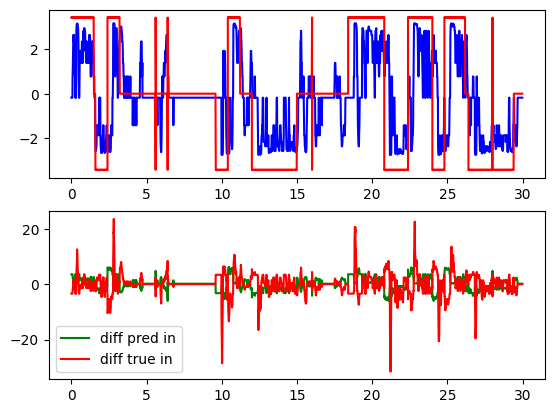

In [ ]:
# data organization
y = np.array(dbx)
if STACK:
    stacks = []
    for j in range(Nstack):
        stacks += [np.hstack( (mdx[:j],mdx[j:]) )]     

    # [t0 t-1 t-2 t-3]

    x = np.array(stacks)[:, 1:].T

else :
    x = mdx[1:]  # mdx[:] mdx[]
# print(x)
y = torch.tensor([y]).to(torch.float32)
x = torch.tensor(x).to(torch.float32)

# plt.plot(loss_val)

ypred = ann_controller(x)
fig, axs = plt.subplots(2,1)
axs[0].plot(time[1:], ypred[:,0].detach().numpy(), 'b', label='prediction')
axs[0].plot(time[1:], y.T[:,0].detach().numpy(), 'r', label='target')
# plt.plot(time[1:], mdx[1:], 'g.', label='input')
axs[1].plot(time[1:],  y.T[:,0].detach().numpy() - ypred[:,0].detach().numpy(), 'g', label='diff pred true')
axs[1].plot(time[1:], mdx[1:]- y.T[:,0].detach().numpy(), 'r', label='diff true in')

plt.legend()


print("xshape : ", x.T.shape)
print("ypred shape : ", ypred.shape)
print("ypred : ", ypred[:,0])

In [8]:
Nstack = 10